# Data Preprocessing

## Dataset : Wine Quality

### Description

The dataset contains different chemical information about wine. It has 4898 instances with 14 variables each. The dataset is good for classification and regression tasks. The model can be used to predict wine quality.

In [9]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,NaN,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
863,6.2,0.28,0.33,1.7,0.029,24.0,111.0,0.9900,3.24,0.50,12.1,6.0
864,4.8,0.33,0.00,6.5,0.028,34.0,163.0,0.9937,3.35,0.61,9.9,5.0
865,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.9886,3.12,0.30,12.5,6.0
866,6.9,0.18,0.36,1.3,0.036,NaN,NaN,0.9934,3.27,0.95,9.5,7.0


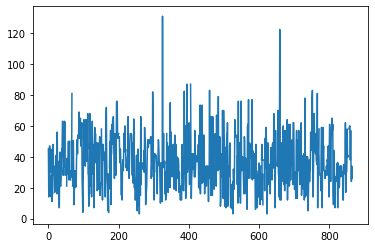

In [10]:
# Dataset presentation
white_wine = pd.read_csv("./data/winequality-white.csv",sep=";")
x = white_wine["free sulfur dioxide"]
plt.plot(x)
white_wine

## Data cleaning

Data cleaning routines work to **clean** the data by filling in missing values, smoothing noisy data, identifying or removing outliers, and resolving inconsistencies

### Missing data

Occur when no data value is stored for a variable in anobservation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data

In [16]:
# Imputation technique with mean
white_wine = white_wine.fillna(white_wine.mean())
print(white_wine.isnull().sum())
white_wine

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.00000,146.858502,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.00000,132.000000,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.00000,97.000000,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.00000,186.000000,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.00000,186.000000,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
863,6.2,0.28,0.33,1.7,0.029,24.00000,111.000000,0.9900,3.24,0.50,12.1,6.0
864,4.8,0.33,0.00,6.5,0.028,34.00000,163.000000,0.9937,3.35,0.61,9.9,5.0
865,6.1,0.27,0.33,2.2,0.021,26.00000,117.000000,0.9886,3.12,0.30,12.5,6.0
866,6.9,0.18,0.36,1.3,0.036,36.70094,146.858502,0.9934,3.27,0.95,9.5,7.0


### Noise

Noise is incorrect, void, null information that is not useful at all, under any circumstances

In [33]:
# Binning technique by boundries
ph_bins = ["Ultra acidic", "Extremely acidic", "Very strongly acidic", "Strongly acidic", "Moderately acidic", "Slightly acidic", "Neutral", "Slightly alkaline", "Moderately alkaline", "Strongly alkaline", "Very strongly alkaline"]
ph_intervals = [0, 3.5, 4.4, 5.0, 5.5, 6.0, 6.5, 7.3, 7.8, 8.4, 9.0, 14]
white_wine["pH"] =  pd.cut(white_wine["pH"], bins=ph_intervals , labels=ph_bins)
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,146.858502,1.0010,Ultra acidic,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.000000,0.9940,Ultra acidic,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.000000,0.9951,Ultra acidic,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.000000,0.9956,Ultra acidic,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.000000,0.9956,Ultra acidic,0.40,9.9,6.0


## Outliers 

An outlier is not a false value or void in meaning. It is definite and accuratebut when it is linked with the other tuples, it is just not in the same range

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

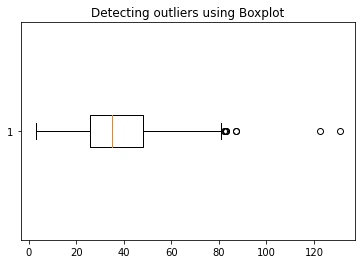

In [38]:
# Detecting outliers using boxplot 
plt.boxplot(white_wine["free sulfur dioxide"], vert=False)

plt.title("Detecting outliers using Boxplot")

Outliers from IQR method:  [82.0, 82.5, 83.0, 83.0, 87.0, 87.0, 122.5, 131.0]


Text(0.5, 1.0, 'Boxplot after median imputation')

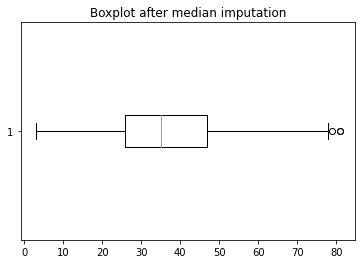

In [138]:
# Detect outliers
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_iqr(white_wine["free sulfur dioxide"])
print("Outliers from IQR method: ", sample_outliers)

# Median imputation : Replacing outliers with the median
median = np.median(white_wine["free sulfur dioxide"])
c= white_wine["free sulfur dioxide"].replace(sample_outliers, median)
plt.boxplot(c, vert=False)
plt.title("Boxplot after median imputation")

### Data inconsistency

It refers to a situation of keeping the same data in different formats. It often arise between various duplicates, due to inaccurate data entry or updating some but not all data occurrences or in data representations (e.g., “2010/12/25” and “25/12/2010” for date)

In [ ]:
# There is no data inconsistency in our dataset

## Data Reduction

Data reduction obtains a reduced representation of the data set that is much smaller in volume, yet produces the same (or almost the same) analytical results

### Feature Selection 
Techniques seek to reduce the number of original features by selecting those that are relevant and eliminating irrelevant andredundant ones

In [164]:
# SelectKBest and chi2
from sklearn.feature_selection import SelectKBest, chi2
# X = chi2(white_wine, white_wine["sulphates"])
# selector = SelectKBest(X, k=2)
# print(selector.get_Support())

### Feature Extraction
Techniques, new attributes are constructed from thegiven set of attributes

In [ ]:
# code

## Data Transformation

### Normalization

In [ ]:
# code

### Discretization

In [ ]:
# code 

## Data Balancing

**Inbalanced data** refers to a dataset within which one or some of the classes have a much greater number of training examples thanthe others

### Sampling

Consists of the modification of an imbalanced data set by some mechanisms in order to provide a balanced distribution

In [ ]:
# code

### In-cost-sensitive

Instead of each instance being either correctly or incorrectly classified, each class is given a misclassification cost. Thus, instead of trying to optimize the accuracy, the problem is then to minimize the total misclassificationcost.

In [ ]:
# code